In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/NLP/data/ratings_train.txt', sep='\t')

In [7]:
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [9]:
sum(df['document'].isnull())

5

In [10]:
df = df[~df['document'].isnull()]

In [11]:
sum(df['document'].isnull())

0

In [12]:
df['document'].iloc[0].split()

['아', '더빙..', '진짜', '짜증나네요', '목소리']

In [14]:
# tokenization
vocab = set()
for doc in df['document']:
    for token in doc.split():
        vocab.add(token)

In [15]:
len(vocab) # 너무 많음

357862

In [17]:
vocab_cnt_dict = {}
for doc in df['document']:
    for token in doc.split():
        if token not in vocab_cnt_dict:
            vocab_cnt_dict[token] = 0
        vocab_cnt_dict[token] += 1

In [19]:
vocab_cnt_list = [(token, cnt) for token, cnt in vocab_cnt_dict.items()]
vocab_cnt_list[:10]

[('아', 1204),
 ('더빙..', 2),
 ('진짜', 5929),
 ('짜증나네요', 10),
 ('목소리', 99),
 ('흠...포스터보고', 1),
 ('초딩영화줄....오버연기조차', 1),
 ('가볍지', 17),
 ('않구나', 2),
 ('너무재밓었다그래서보는것을추천한다', 1)]

In [21]:
top_vocabs = sorted(vocab_cnt_list, key = lambda tup:tup[1], reverse = True)
top_vocabs[:10]

[('영화', 10825),
 ('너무', 8239),
 ('정말', 7791),
 ('진짜', 5929),
 ('이', 5059),
 ('영화.', 3598),
 ('왜', 3285),
 ('더', 3260),
 ('이런', 3249),
 ('그냥', 3237)]

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
cnts = [cnt for _, cnt in top_vocabs]

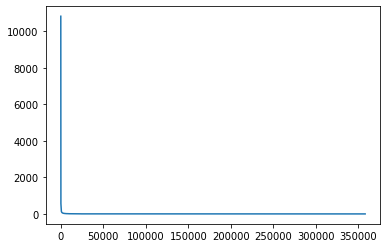

In [24]:
plt.plot(range(len(cnts)), cnts)

In [25]:
np.mean(cnts)

3.1792590439890236

In [26]:
n_vocab = sum(np.array(cnts) > 2)
n_vocab

42635

In [27]:
top_vocabs_truncated = top_vocabs[:n_vocab]

In [28]:
vocabs = [token for token, _ in top_vocabs_truncated]

In [29]:
vocabs[:5]

['영화', '너무', '정말', '진짜', '이']

## PAD token UNK token!

- UNK token은 Unknown token을 의미한다.
- PAD token은 Padding을 위한 token을 의미한다.

In [31]:
unk_token = '[UNK]'
unk_token in vocabs

False

In [32]:
pad_token = '[PAD]'
pad_token in vocabs

False

In [33]:
vocabs.insert(0, unk_token)
vocabs.insert(0, pad_token)

In [35]:
vocabs[:5]

['[PAD]', '[UNK]', '영화', '너무', '정말']

In [42]:
idx_to_token = vocabs
token_to_idx = {token:i for i, token in enumerate(vocabs)}

In [43]:
class Tokenizer:
    def __init__(self, vocabs, use_padding=True, max_padding = 64, pad_token='[PAD]', unk_token='[UNK]'):
        self.idx_to_token = vocabs
        self.token_to_idx = {token:i for i, token in enumerate(self.idx_to_token)}

        self.use_padding = use_padding
        self.max_padding = max_padding

        self.pad_token = pad_token
        self.unk_token = unk_token

        self.unk_token_idx = token_to_idx[self.unk_token]
        self.pad_token_idx = token_to_idx[self.pad_token]

    def __call__(self, x:str):
        token_ids = []

        token_list = x.split()

        for token in token_list:
            if token in self.token_to_idx:
                token_idx = self.token_to_idx[token]
            else:
                token_idx = self.unk_token_idx
            token_ids.append(token_idx)
        if self.use_padding:
            token_ids = token_ids[:self.max_padding]
            n_pads = self.max_padding - len(token_ids)
            token_ids = token_ids + [self.pad_token_idx] * n_pads
        return token_ids

In [44]:
tokenizer = Tokenizer(vocabs, use_padding = False)

In [45]:
sample = df['document'].iloc[0]
print(sample)

아 더빙.. 진짜 짜증나네요 목소리


In [47]:
tokenizer(sample)

[51, 1, 5, 10485, 1064]

In [48]:
token_length_list = []
for sample in df['document']:
    token_length_list.append(len(tokenizer(sample)))

Text(0, 0.5, 'count')

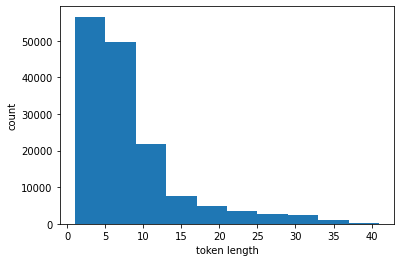

In [49]:
plt.hist(token_length_list)
plt.xlabel("token length")
plt.ylabel("count")

In [50]:
max(token_length_list)

41

In [51]:
tokenizer = Tokenizer(vocabs, use_padding=True, max_padding=50, pad_token='[PAD]', unk_token='[UNK]')

In [52]:
tokenizer(sample)

[201,
 2,
 3635,
 1,
 121,
 1946,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# DataLoader

In [53]:
import torch
from torch.utils.data import Dataset, DataLoader

In [54]:
train_valid_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/NLP/data/ratings_train.txt", sep='\t')
test_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/NLP/data/ratings_test.txt", sep='\t')

In [55]:
print(f"# of train valid samples: {len(train_valid_df)}")
print(f"# of test samples: {len(test_df)}")

# of train valid samples: 150000
# of test samples: 50000


In [56]:
train_valid_df = train_valid_df.sample(frac=1.)

In [57]:
train_ratio = 0.8

n_train = int(len(train_valid_df) * train_ratio)

train_df = train_valid_df[:n_train]
valid_df = train_valid_df[n_train:]

In [58]:
print(f"# of train samples: {len(train_df)}")
print(f"# of valid samples: {len(valid_df)}")
print(f"# of test samples: {len(test_df)}")

# of train samples: 120000
# of valid samples: 30000
# of test samples: 50000


In [59]:
train_df = train_df.sample(frac=0.1)
valid_df = valid_df.sample(frac=0.1)
test_df = test_df.sample(frac=0.1)

In [60]:
class NSMCDataset(Dataset):

    def __init__(self, data_df, tokenizer = None):
        self.data_df = data_df
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, idx):
        sample_raw = self.data_df.iloc[idx]
        sample = {}

        sample['doc'] = str(sample_raw['document'])
        sample['label'] = int(sample_raw['label'])

        assert sample['label'] in set([0, 1])

        if self.tokenizer is not None:
            sample['doc_ids'] = self.tokenizer(sample['doc'])
        return sample

In [173]:
def collate_fn(batch):
    keys = [key for key in batch[0].keys()]
    data = {key: [] for key in keys}

    for item in batch:
        for key in keys:
            data[key].append(item[key])
    return data

In [174]:
train_dataset = NSMCDataset(data_df = train_df, tokenizer = tokenizer)
valid_dataset = NSMCDataset(data_df = valid_df, tokenizer = tokenizer)
test_dataset = NSMCDataset(data_df = test_df, tokenizer = tokenizer)

train_dataloader= DataLoader(train_dataset,
                             batch_size=128,
                             collate_fn=collate_fn,
                             shuffle=True)
valid_dataloader= DataLoader(valid_dataset,
                             batch_size=128,
                             collate_fn=collate_fn,
                             shuffle=False)

test_dataloader= DataLoader(test_dataset,
                            batch_size=128,
                            collate_fn=collate_fn,
                            shuffle=False)

In [81]:
sample = next(iter(test_dataloader))

128


In [82]:
sample.keys()

dict_keys(['doc', 'label', 'doc_ids'])

In [83]:
sample['doc'][2]

'첫회부터 계속 따뜻한 마음으로 보고있답니다. 끝까지 본방사수할께요. ^^'

In [84]:
sample['doc_ids'][2]

[27802,
 110,
 419,
 1539,
 1,
 67,
 1,
 154,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# CBOW model

In [175]:
import torch
import torch.nn as nn

class CBOW(nn.Module):

    def __init__(self, vocab_size, embed_dim):
        super().__init__()

        self.output_dim = embed_dim
        # padding은 embedding을 lookup해서 사용하지 않게 하기 위해
        # vocab_size * embed_dim 의 크기를 가진 테이블 생성
        self.embeddings = nn.Embedding(vocab_size, embed_dim, padding_idx=0)

    def forward(self, x):

        # (batch_size, sequence) -> (batch_size, sequence, embed_dim)
        # 해당 시퀀스를 Look up table을 보고 가져옴
        x_embeded = self.embeddings(x)
        stnc_repr = torch.mean(x_embeded, dim=1) # batch_size x embed_dim
        return stnc_repr

In [176]:
import torch
import numpy as np

# 모델 초기화
model = CBOW(vocab_size=5, embed_dim=16)

# 임의의 입력 데이터 생성
# 32개 배치 10개의 시퀀스 데이터 
# 32 * 10 -> 32 * 10 * 16 -> 32 * 16 데이터로 변환
input_data = np.random.randint(0, 5, size=(32, 10))

# 모델에 입력 데이터 전달하여 출력값 확인
output = model(torch.tensor(input_data, dtype=torch.int64))
print(output.shape)

# 그래디언트가 필요하지 않은 경우에만 detach()와 .numpy()를 함께 사용
output_np = output.detach().numpy()

#print(output_np.shape) # 예상 출력값: (32, 100)

torch.Size([32, 16])


In [177]:
class Classifier(nn.Module):

    def __init__(self, sr_model, output_dim, vocab_size, embed_dim, **kwargs):
        super().__init__()

        self.sr_model = sr_model(vocab_size = vocab_size, embed_dim = embed_dim, **kwargs)
        self.input_dim = self.sr_model.output_dim
        self.output_dim = output_dim
        self.fc = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        return self.fc(self.sr_model(x))

In [178]:
model = Classifier(sr_model=CBOW,
                   output_dim=2,
                   vocab_size=len(vocabs),
                   embed_dim=16)

In [179]:
# nn.Embedding(vocab_size, embed_dim, padding_idx=0)
# padding_idx를 설정해놓으면,
# padding_idx의 embedding은 0으로 초기화
# padding index의 embedding은 gradient 계산을 하지 않음, 즉 padding embedding은 업데이트 되지 않음

model.sr_model.embeddings.weight[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<SelectBackward0>)

# Training

In [180]:
use_cuda = True and torch.cuda.is_available()

if use_cuda:
    model.cuda()

In [181]:
import torch.optim as optim
import numpy as np
from copy import deepcopy

In [182]:
optimizer = optim.Adam(params=model.parameters(), lr=0.01)
calc_loss = nn.CrossEntropyLoss()

In [183]:
n_epoch = 10
global_i = 0

valid_loss_history = [] # [(global_i, valid_loss), ...]
train_loss_history = [] # [(global_i, train_loss), ...]

min_valid_loss = 9e+9
best_model = None
best_epoch_i = None

ema_train_loss = None

for epoch_i in range(n_epoch):
    model.train()

    for batch in train_dataloader:
        optimizer.zero_grad()
        x = torch.tensor(batch['doc_ids'])
        y = torch.tensor(batch['label'])

        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        y_pred = model(x)
        loss = calc_loss(y_pred, y)

        if global_i % 1000 == 0:
            print(f"global_i: {global_i}, epoch_i: {epoch_i}, loss: {loss.item()}")
        
        train_loss_history.append((global_i, loss.item()))

        loss.backward()
        optimizer.step()
        global_i += 1
    model.eval()

    # validation

    valid_loss_list = []
    for batch in valid_dataloader:
        x = torch.tensor(batch['doc_ids'])
        y = torch.tensor(batch['label'])

        if use_cuda:
            x = x.cuda()
            y = y.cuda()

        y_pred = model(x)
        loss = calc_loss(y_pred, y)
        valid_loss_list.append(loss.item())

    
    valid_loss_mean = np.mean(valid_loss_list)
    valid_loss_history.append((global_i, valid_loss_mean.item()))
    
    
    if valid_loss_mean < min_valid_loss:
        min_valid_loss = valid_loss_mean
        best_epoch_i = epoch_i
        best_model = deepcopy(model)
        
    if epoch_i % 2 == 0:
        print("*"*30)
        print(f"valid_loss_mean: {valid_loss_mean}")
        print("*"*30)
print(f"best_epoch_i: {best_epoch_i}")

global_i: 0, epoch_i: 0, loss: 0.6821851134300232
******************************
valid_loss_mean: 0.6639865562319756
******************************
******************************
valid_loss_mean: 0.5322051693995794
******************************
******************************
valid_loss_mean: 0.5436053934196631
******************************
******************************
valid_loss_mean: 0.5887767958144347
******************************
******************************
valid_loss_mean: 0.6419894757370154
******************************
best_epoch_i: 3


# Learning Curve

In [184]:
def calc_moving_average(arr, win_size=100):
    new_arr = []
    win = []
    
    for i, val in enumerate(arr):
        win.append(val)
        if len(win) > win_size:
            win.pop(0)
        
        new_arr.append(np.mean(win))
    return np.array(new_arr)

Text(0, 0.5, 'loss')

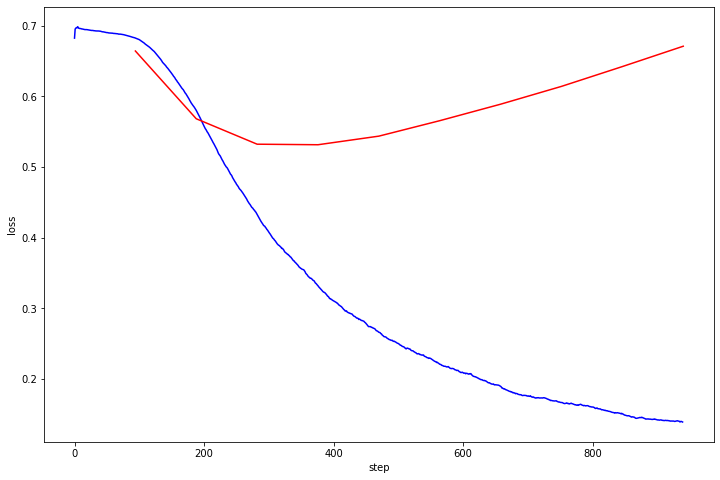

In [185]:
valid_loss_history = np.array(valid_loss_history)
train_loss_history =  np.array(train_loss_history)

plt.figure(figsize=(12,8))
plt.plot(train_loss_history[:,0],
         calc_moving_average(train_loss_history[:,1]), color='blue')

plt.plot(valid_loss_history[:,0],
         valid_loss_history[:,1], color='red')
plt.xlabel("step")
plt.ylabel("loss")

# Evaluation

In [186]:
from tqdm.auto import tqdm

In [187]:
model = best_model

model.eval()

total = 0
correct = 0

for batch in tqdm(test_dataloader,
                  total=len(test_dataloader.dataset)//test_dataloader.batch_size):
    x = torch.tensor(batch['doc_ids'])
    y = torch.tensor(batch['label'])

    if use_cuda:
        x = x.cuda()
        y = y.cuda()
    y_pred = model(x)
    
    curr_correct = y_pred.argmax(dim=1) == y
    
    total += len(curr_correct)
    correct += sum(curr_correct)
    
print(f"test accuracy: {correct/total}")

  0%|          | 0/39 [00:00<?, ?it/s]

test accuracy: 0.7102000117301941
